In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
raw_data = pd.read_csv('Absenteeism-data-preprocessed.csv')
raw_data.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,2,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,2,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,3,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,4,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,4,289,36,33,239.554,30,0,2,1,2


In [3]:
raw_data.describe(include='all')

,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.250000,0.008571,0.090000,0.597143,6.36000,3.011429,222.347143,29.892857,36.417143,271.801774,26.737143,0.167143,1.021429,0.687143,6.761429
std,0.433322,0.092250,0.286386,0.490823,3.50501,1.480396,66.312960,14.804446,6.379083,40.021804,4.254701,0.373370,1.112215,1.166095,12.670082
min,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,118.000000,5.000000,27.000000,205.917000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.00000,2.000000,179.000000,16.000000,31.000000,241.476000,24.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,1.000000,6.00000,3.000000,225.000000,26.000000,37.000000,264.249000,25.000000,0.000000,1.000000,0.000000,3.000000
75%,0.250000,0.000000,0.000000,1.000000,10.00000,4.000000,260.000000,50.000000,40.000000,294.217000,31.000000,0.000000,2.000000,1.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,12.00000,7.000000,388.000000,52.000000,58.000000,378.884000,38.000000,1.000000,4.000000,8.000000,120.000000


In [4]:
raw_data.isnull().sum() # check for null 

Reason_1                     0
Reason_2                     0
Reason_3                     0
Reason_4                     0
Month                        0
Day                          0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

In [5]:
#data_nmv = raw_data.dropna(axis = 0) drop null 

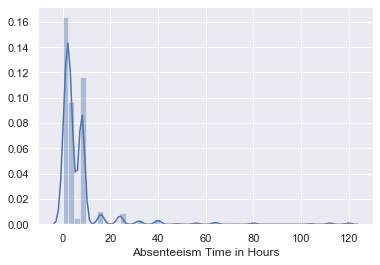

In [6]:
sns.distplot(raw_data['Absenteeism Time in Hours'])

In [7]:
df = raw_data.copy()

In [8]:
df['Absent'] = np.where(df['Absenteeism Time in Hours']>df['Absenteeism Time in Hours'].median(),1,0)
targets = df['Absent']
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Absent
0,0,0,0,1,7,2,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,2,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,3,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,4,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,4,289,36,33,239.554,30,0,2,1,2,0


In [9]:
# check balance
100*targets.sum()/targets.shape[0]

45.57142857142857

In [10]:
df_targets = df.drop(['Absenteeism Time in Hours','Day', 
                      'Distance to Work','Daily Work Load Average'], axis = 1)
df_targets is df

False

In [11]:
unsc_inputs = df_targets.iloc[:,:-1]
unsc_inputs.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,289,33,30,0,2,1
1,0,0,0,0,7,118,50,31,0,1,0
2,0,0,0,1,7,179,38,31,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0
4,0,0,0,1,7,289,33,30,0,2,1


### Standardization

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator, TransformerMixin):
    
    def __init__(self,columns,copy = True,with_mean = True,with_std = True):
        self.scaler = StandardScaler(copy,with_mean,with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None
    
    def fit(self, X, y = None):
        self.scaler.fit(X[self.columns])
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    def transform(self, X, y = None, copy = None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]),columns = self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled,X_scaled],axis=1)[init_col_order]

#scaler = StandardScaler()

In [13]:
unsc_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [14]:
#cols = ['Month', 'Day', 'Transportation Expense', 'Distance to Work', 'Age',
#       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets']

cols_omit = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Education']
cols = [x for x in unsc_inputs.columns.values if x not in cols_omit]

In [15]:
scaler = CustomScaler(cols)

In [16]:
scaler.fit(unsc_inputs)

df_inputs = scaler.transform(unsc_inputs)
df_inputs

,Reason_1,Reason_2,Reason_3,Reason_4,Month,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,0.182726,1.005844,-0.536062,0.767431,0,0.880469,0.268487
1,0,0,0,0,0.182726,-1.574681,2.130803,1.002633,0,-0.019280,-0.589690
2,0,0,0,1,0.182726,-0.654143,0.248310,1.002633,0,-0.919030,-0.589690
3,1,0,0,0,0.182726,0.854936,0.405184,-0.643782,0,0.880469,-0.589690
4,0,0,0,1,0.182726,1.005844,-0.536062,0.767431,0,0.880469,0.268487
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,-0.388293,-0.654143,0.562059,-1.114186,1,0.880469,-0.589690
696,1,0,0,0,-0.388293,0.040034,-1.320435,-0.643782,0,-0.019280,1.126663
697,1,0,0,0,-0.388293,1.624567,-1.320435,-0.408580,1,-0.919030,-0.589690
698,0,0,0,1,-0.388293,0.190942,-0.692937,-0.408580,1,-0.919030,-0.589690


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_inputs, targets, test_size = 0.25, random_state = 1997)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(525, 11) (175, 11) (525,) (175,)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [19]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

/home/hajali/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
reg.score(x_train,y_train) #accuracy

0.7561904761904762

### Manually checking accuracy

In [21]:
y_hat = reg.predict(x_train)
print(np.sum(y_hat == y_train)/y_hat.shape[0])

0.7561904761904762


In [22]:
print(reg.intercept_, reg.coef_)

[-1.46375216] [[ 2.59623801  0.49600874  2.61961827  0.80749202  0.07514135  0.52410028
  -0.09153067  0.23212413 -0.10999443  0.48519172 -0.14738   ]]


In [23]:
feature_name = unsc_inputs.columns.values

In [24]:
summary = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary['Coefficients'] = np.transpose(reg.coef_)
summary.index = summary.index + 1
summary.loc[0] = ['Intercept', reg.intercept_[0]]
summary = summary.sort_index()
summary

,Feature name,Coefficients
0,Intercept,-1.463752
1,Reason_1,2.596238
2,Reason_2,0.496009
3,Reason_3,2.619618
4,Reason_4,0.807492
5,Month,0.075141
6,Transportation Expense,0.524100
7,Age,-0.091531
8,Body Mass Index,0.232124
9,Education,-0.109994


In [25]:
summary['Odds ratio'] = np.exp(summary.Coefficients)
summary = summary.sort_values('Odds ratio',ascending = False)
summary

# weight of 0 implies that no matter the feature value, we will multiply it by 0
# for a unit change in the standardized feature, the odds increase by a multiple equal to the odds ratio, 1 means no change

,Feature name,Coefficients,Odds ratio
3,Reason_3,2.619618,13.730481
1,Reason_1,2.596238,13.413183
4,Reason_4,0.807492,2.242277
6,Transportation Expense,0.524100,1.688939
2,Reason_2,0.496009,1.642154
10,Children,0.485192,1.624486
8,Body Mass Index,0.232124,1.261276
5,Month,0.075141,1.078037
7,Age,-0.091531,0.912533
9,Education,-0.109994,0.895839


In [26]:
reg.score(x_test,y_test) - reg.score(x_train,y_train) #accuracy

0.0323809523809524

In [27]:
predicted_proba = reg.predict_proba(x_test)
predicted_proba

array([[0.77584657, 0.22415343],
       [0.71538474, 0.28461526],
       [0.06703335, 0.93296665],
       [0.41887946, 0.58112054],
       [0.76057047, 0.23942953],
       [0.77209354, 0.22790646],
       [0.50597625, 0.49402375],
       [0.34479019, 0.65520981],
       [0.12130854, 0.87869146],
       [0.7475848 , 0.2524152 ],
       [0.75953525, 0.24046475],
       [0.86146845, 0.13853155],
       [0.55295391, 0.44704609],
       [0.66195449, 0.33804551],
       [0.70441989, 0.29558011],
       [0.17700482, 0.82299518],
       [0.68224768, 0.31775232],
       [0.77584657, 0.22415343],
       [0.79802867, 0.20197133],
       [0.0851749 , 0.9148251 ],
       [0.77584657, 0.22415343],
       [0.67222363, 0.32777637],
       [0.14352776, 0.85647224],
       [0.77584657, 0.22415343],
       [0.85090616, 0.14909384],
       [0.09575525, 0.90424475],
       [0.50061314, 0.49938686],
       [0.48288827, 0.51711173],
       [0.41329357, 0.58670643],
       [0.09953541, 0.90046459],
       [0.

# Saving the model

In [29]:
import pickle 

In [30]:
with open('model','wb') as file: #name and method(write byte)
    pickle.dump(reg,file)

In [31]:
with open('scaler','wb') as file:
    pickle.dump(scaler,file)